<a href="https://colab.research.google.com/github/wldud01/Naver_Boost_Study_13th/blob/main/%5BboostCourse%5DWeek3_Mission_%EC%9C%A4%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BoostCourse 3주차 미션
- 건강검진 데이터 활용하기

### 📍수행하기 전에 아래 코드 포함하기

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib
!pip install koreanize_matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as pltt

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

### 📍Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [3]:
#@title 결측치 줄이고 메모리 확보하기
null_data = df.isna().sum()
null_data_list = null_data[null_data>10000].index.tolist()
null_data_list

['치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석']

In [4]:
df_drop= df.drop(null_data_list,axis = 1)
display(df.info())
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   성별코드         1000000 non-null  int64  
 3   연령대코드(5세단위)  1000000 non-null  int64  
 4   시도코드         1000000 non-null  int64  
 5   신장(5Cm단위)    999738 non-null   float64
 6   체중(5Kg 단위)   999732 non-null   float64
 7   허리둘레         999560 non-null   float64
 8   시력(좌)        999712 non-null   float64
 9   시력(우)        999721 non-null   float64
 10  청력(좌)        999758 non-null   float64
 11  청력(우)        999757 non-null   float64
 12  수축기혈압        999924 non-null   float64
 13  이완기혈압        999923 non-null   float64
 14  식전혈당(공복혈당)   999957 non-null   float64
 15  총콜레스테롤       999957 non-null   float64
 16  트리글리세라이드     999957 non-null   float64
 17  HDL콜레스테롤     999956 non-null   float64
 18  LDL

In [5]:
#@title 연령대 dictionary
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
18: '85세+'}

In [6]:
df_drop.groupby(["연령대코드(5세단위)"])["허리둘레"].count()

연령대코드(5세단위)
5      23244
6      64898
7      77517
8      84621
9     130912
10    118357
11    129833
12    112175
13    106491
14     53624
15     51586
16     25972
17     16205
18      4125
Name: 허리둘레, dtype: int64

In [7]:
#@title 연령대 column 생성하기
for k in range(1,len(age_code)+1):
  df_drop.loc[df_drop["연령대코드(5세단위)"]==k,"연령대코드(5세단위)"] = age_code[k]
df_drop.head(3)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,15.9,1.0,1.0,19.0,41.0,25.0,3.0,0.0,1,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.7,1.0,0.9,16.0,13.0,10.0,1.0,0.0,1,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,16.1,1.0,1.1,45.0,62.0,136.0,1.0,0.0,1,20181126


In [8]:
#변경 잘 되었는지 확인
df_drop["연령대코드(5세단위)"].unique()

array(['60~64세', '35~39세', '55~59세', '25~29세', '80~84세', '45~49세',
       '40~44세', '70~74세', '20~24세', '50~54세', '30~34세', '65~69세',
       '75~79세', '85세+'], dtype=object)

In [9]:
df_drop=df_drop.rename(columns={"연령대코드(5세단위)":"연령대"})
df_drop.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대', '시도코드', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '데이터공개일자'],
      dtype='object')

<Axes: ylabel='연령대'>

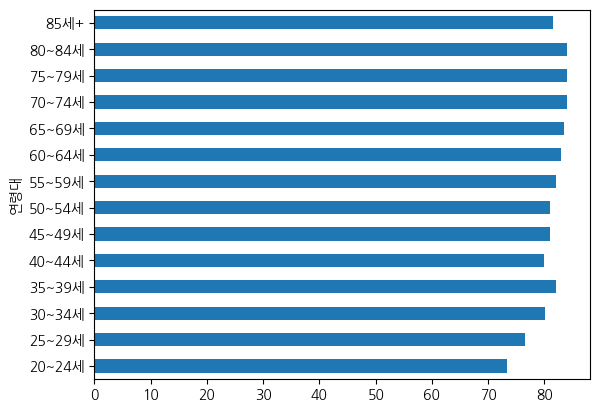

In [10]:
df_drop.groupby(["연령대"])["허리둘레"].median().plot.barh()

In [11]:
#@title 연령대별 허리 둘레
df_drop.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [12]:
#@title 이상치 살펴보기
df_drop[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].describe()

,HDL콜레스테롤,LDL콜레스테롤,체중(5Kg 단위),허리둘레,감마지티피
count,999956.000000,997101.000000,999732.000000,999560.000000,999955.000000
mean,56.880750,112.963882,63.409614,81.370788,37.233369
std,18.448444,35.864249,12.879205,12.205698,50.605298
min,1.000000,1.000000,20.000000,0.000000,1.000000
25%,46.000000,89.000000,55.000000,74.200000,16.000000
50%,55.000000,111.000000,60.000000,81.000000,23.000000
75%,66.000000,135.000000,70.000000,88.000000,40.000000
max,7711.000000,2226.000000,180.000000,999.000000,999.000000


array([[<Axes: title={'center': 'HDL콜레스테롤'}>,
        <Axes: title={'center': 'LDL콜레스테롤'}>],
       [<Axes: title={'center': '체중(5Kg 단위)'}>,
        <Axes: title={'center': '허리둘레'}>]], dtype=object)

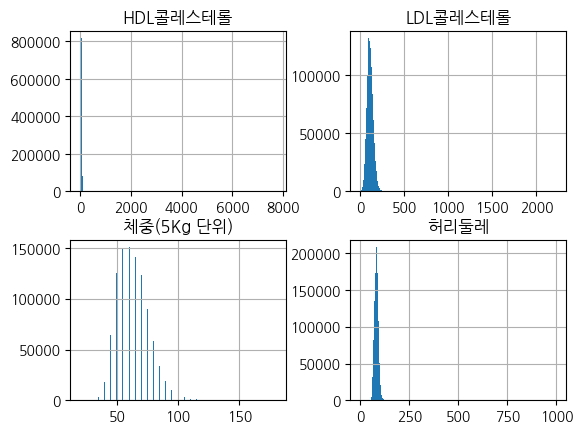

In [13]:
df_drop[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레"]].hist(bins=200)

<Axes: >

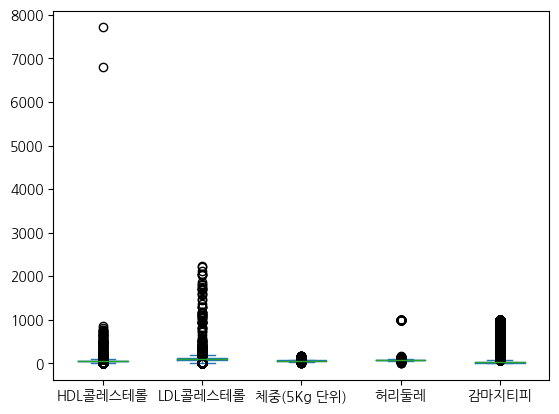

In [14]:
#@ unique한 값 삭제하기
df_drop[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].plot.box()

In [15]:
#@title 특정 컬럼 이상치 제거 과정
column_list =['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]
outlier= []
for c in column_list:
  Q_25 = df_drop[c].quantile(0.25)
  Q_75 = df_drop[c].quantile(0.75)
  IQR =  Q_75 - Q_25
  outlier_small = df_drop[df_drop[c] < Q_25-(IQR*1.5)].index.tolist()
  outlier_big =df_drop[df_drop[c] > Q_75+(IQR*1.5)].index.tolist()
  outlier += outlier_big
  outlier += outlier_small
print(len(outlier))
outlier = list(set(outlier))
df_drop_outlier = df_drop.drop(outlier, axis=0)

143238


,HDL콜레스테롤,LDL콜레스테롤,체중(5Kg 단위),허리둘레,감마지티피
count,871313.000000,869170.000000,871113.000000,870976.000000,871312.000000
mean,56.559974,112.222334,62.001325,80.352233,25.989054
std,13.774351,32.351644,11.384215,9.083250,14.962988
min,16.000000,20.000000,35.000000,53.600000,1.000000
25%,46.000000,89.000000,55.000000,74.000000,15.000000
50%,55.000000,111.000000,60.000000,80.500000,21.000000
75%,66.000000,134.000000,70.000000,87.000000,33.000000
max,96.000000,204.000000,90.000000,108.600000,76.000000


<Axes: >

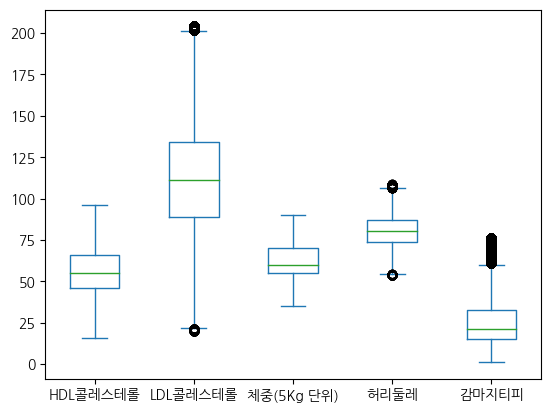

In [16]:
#@title 이상치를 제거한 이후
display(df_drop_outlier[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].describe())
df_drop_outlier[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].plot.box()

<Axes: ylabel='연령대'>

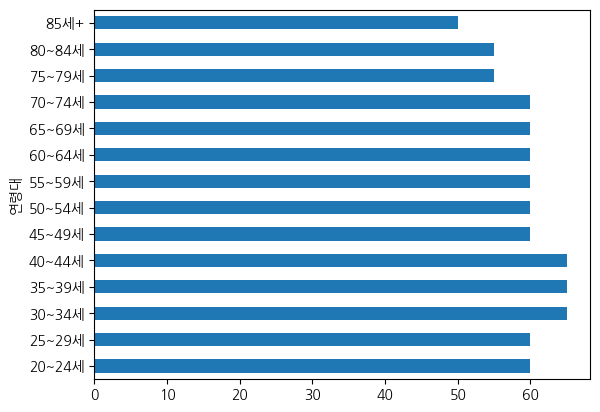

In [17]:
#@title 허리둘레가 높게 나타나는 나이대의 체중이 더 높게 나오지 않을까..?
df_drop_outlier.groupby(["연령대"])["체중(5Kg 단위)"].median().plot.barh()

<Axes: xlabel='연령대'>

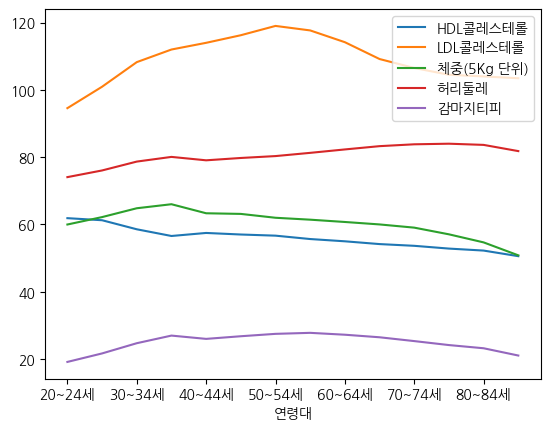

In [48]:
#@title 허리둘레랑 콜레스테롤이랑 비슷하게 나타나지 않을까?
df_drop_outlier.groupby(["연령대"])[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].mean().plot()

<Axes: xlabel='연령대', ylabel='허리둘레'>

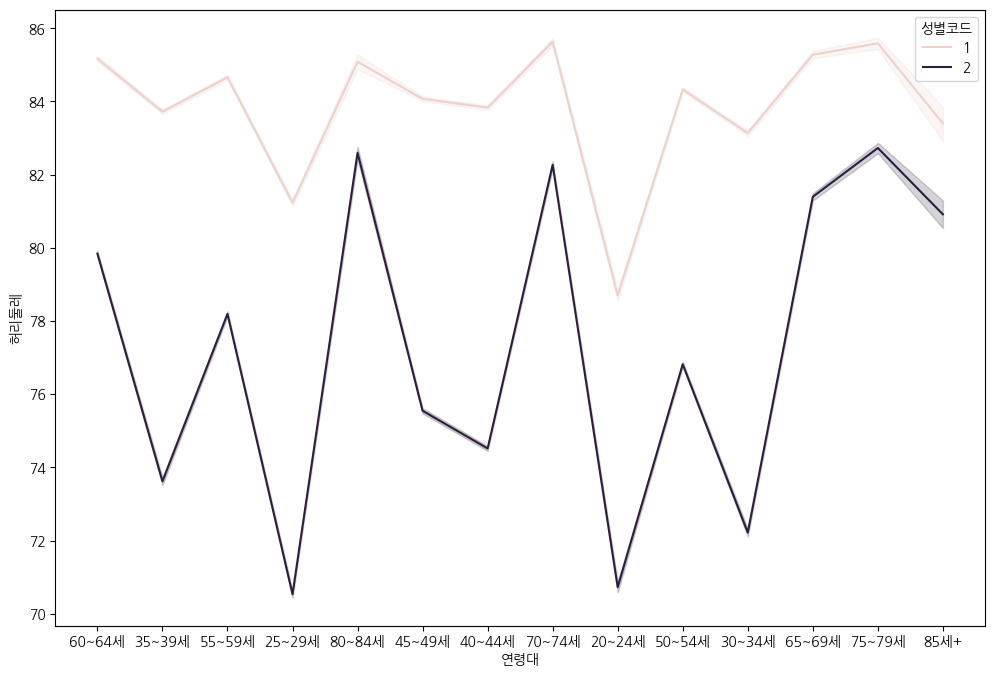

In [52]:
#@title line plot and point plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df_drop_outlier,x = "연령대", y="허리둘레",hue="성별코드")

### 📍Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요

###📍 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [19]:
#@title 흡연 음주 column 생성하기
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

for k in range(1,len(smoke)+1):
  df_drop_outlier.loc[df_drop_outlier["흡연상태"]==k,"흡연상태"] = smoke[k]
for k in range(0,len(drink)):
  df_drop_outlier.loc[df_drop_outlier["음주여부"]==k,"음주여부"] = drink[k]
df_drop_outlier.head(3)

,기준년도,가입자일련번호,성별코드,연령대,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,15.9,1.0,1.0,19.0,41.0,25.0,흡연중,안마심,1,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.7,1.0,0.9,16.0,13.0,10.0,흡연안함,안마심,1,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,13.4,1.0,0.6,21.0,24.0,30.0,흡연안함,마심,0,20181126


음주여부,마심,안마심
흡연상태,,
끊음,96234,50378
흡연안함,189297,369752
흡연중,118363,46755


<Axes: xlabel='흡연상태'>

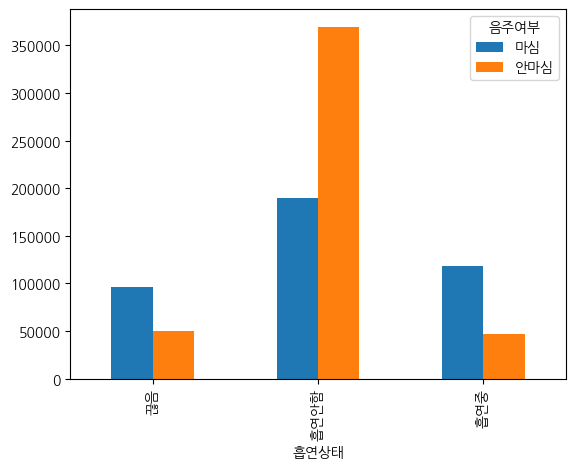

In [20]:
#@title 음주여부에 따른 흡연 상태 사람 수
smoke_drink = df_drop_outlier.groupby(["흡연상태"])["음주여부"].value_counts().unstack(level=1)
display(smoke_drink)
smoke_drink.plot.bar()

In [21]:
#@title 연령대별 음주여부 및 흡연 상태
from matplotlib import figure
groupby_age_smk_drk = df_drop_outlier.groupby(["연령대"])[["음주여부","흡연상태"]].value_counts().unstack(level=-1)
display(groupby_age_smk_drk)

흡연상태            끊음   흡연안함    흡연중
연령대    음주여부                     
20~24세 마심      892   8594   3945
       안마심     277   6660   1129
25~29세 마심     3632  23896  10449
       안마심     945  15942   2975
30~34세 마심     6290  22620  13054
       안마심    1664  18667   3605
35~39세 마심     8849  19507  15775
       안마심    2596  18766   4636
40~44세 마심    13036  28581  20109
       안마심    4750  37776   6733
45~49세 마심    12785  23383  16597
       안마심    4823  37716   5734
50~54세 마심    13880  22435  14994
       안마심    6106  48351   5952
55~59세 마심    12748  15545  10434
       안마심    6661  47146   5332
60~64세 마심    11582  12086   7683
       안마심    7932  50410   4910
65~69세 마심     5404   5285   2800
       안마심    4851  27924   2387
70~74세 마심     4562   4292   1731
       안마심    5115  29984   1878
75~79세 마심     1659   1831    552
       안마심    2634  16491    928
80~84세 마심      810   1052    212
       안마심    1669  10902    464
85세+   마심      105    190     28
       안마심     355   3017     92

<Axes: xlabel='연령대'>

<Axes: xlabel='연령대'>

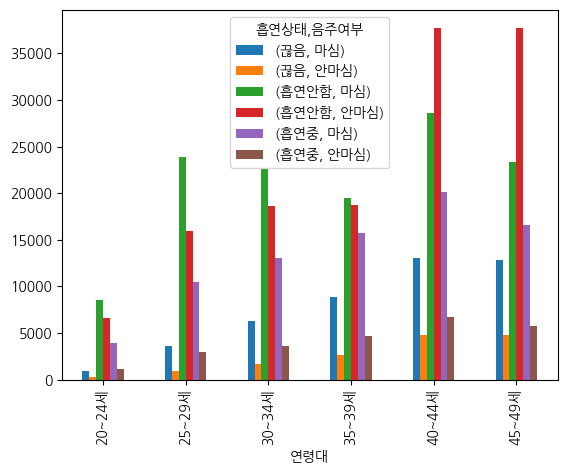

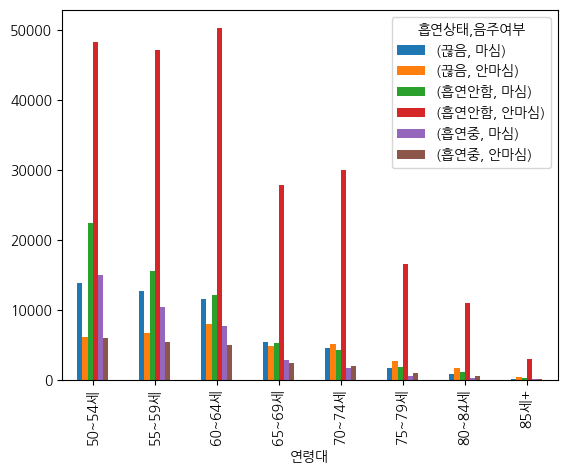

In [22]:
#@title 연령대별 음주상태 및 흡연 상태 시각화
display(groupby_age_smk_drk.unstack()[:6].plot.bar())
display(groupby_age_smk_drk.unstack()[6:].plot.bar())


<Axes: xlabel='흡연상태'>

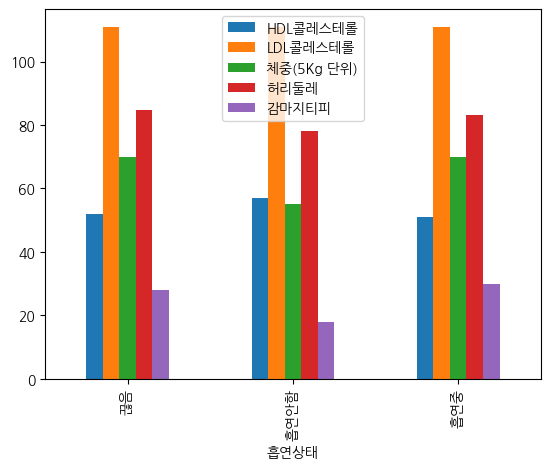

In [23]:
#@title 흡연 상태에 따른 'HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레" 중위값
df_drop_outlier.groupby(["흡연상태"])[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].median().plot.bar()

<Axes: xlabel='음주여부'>

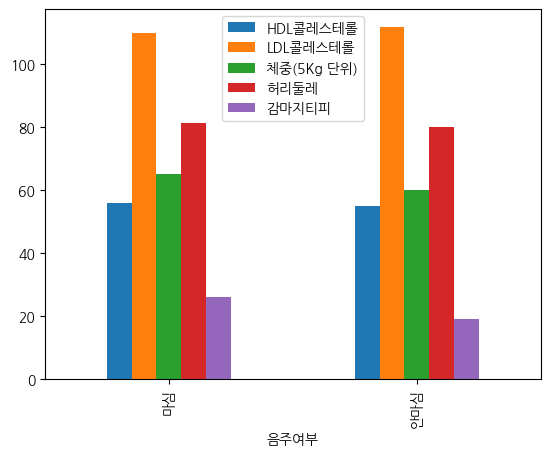

In [24]:
#@title 음주여부에 따른 'HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레" 중위값
df_drop_outlier.groupby(["음주여부"])[['HDL콜레스테롤', 'LDL콜레스테롤',"체중(5Kg 단위)","허리둘레","감마지티피"]].median().plot.bar()

### 📍Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

<Axes: xlabel='연령대', ylabel='감마지티피'>

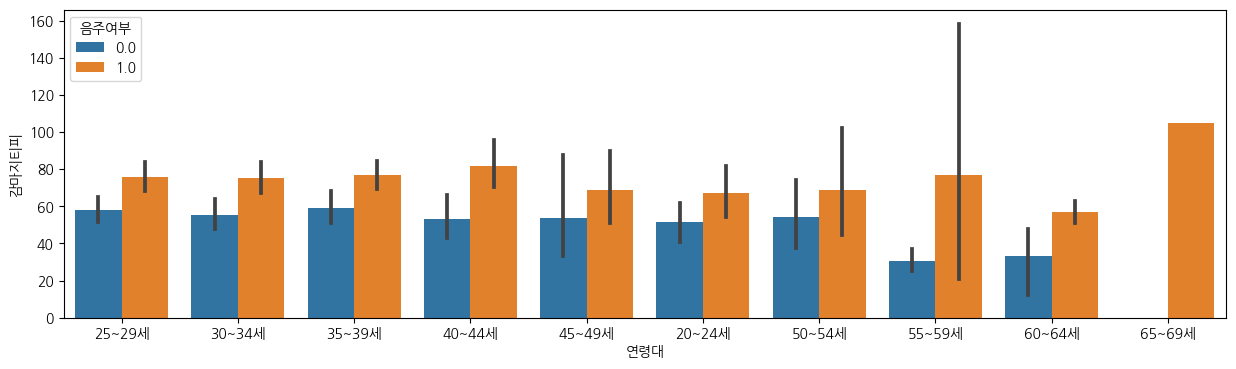

In [32]:
#@title 연령대별 총 콜레스테롤 음주여부에 따른 barplot
import matplotlib.pyplot as plt
weight_120 = df_drop[df_drop["체중(5Kg 단위)"]>=120]
plt.figure(figsize=(15,4))
display(sns.barplot(data=weight_120,x="연령대",y="감마지티피",hue="음주여부"))


<Axes: xlabel='연령대', ylabel='트리글리세라이드'>

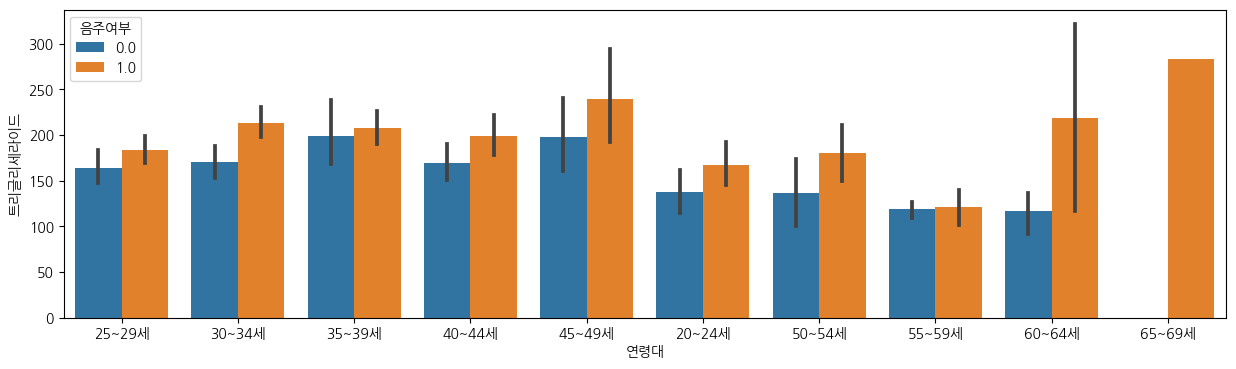

In [35]:
#@title 연령대별 트리글리세라이드 음주여부에 따른 barplot
import matplotlib.pyplot as plt
weight_120 = df_drop[df_drop["체중(5Kg 단위)"]>=120]
plt.figure(figsize=(15,4))
display(sns.barplot(data=weight_120,x="연령대",y="트리글리세라이드",hue="음주여부"))


<Axes: xlabel='연령대', ylabel='감마지티피'>

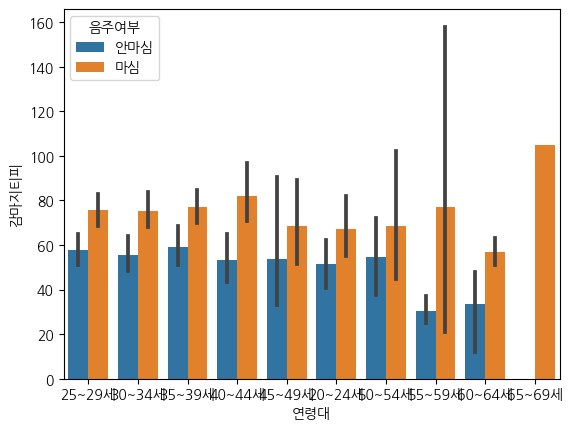

In [56]:
#@title 연령대별, 감마지티피 값 음주여부에 따른 barplot
display(sns.barplot(data=weight_120,x="연령대",y="감마지티피",hue="음주여부"))


<Axes: xlabel='연령대', ylabel='트리글리세라이드'>

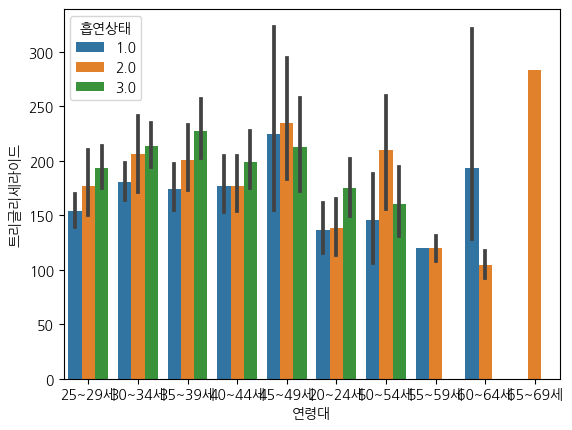

In [38]:
display(sns.barplot(data=weight_120,x="연령대",y="트리글리세라이드",hue="흡연상태"))

<Axes: xlabel='연령대', ylabel='체중(5Kg 단위)'>

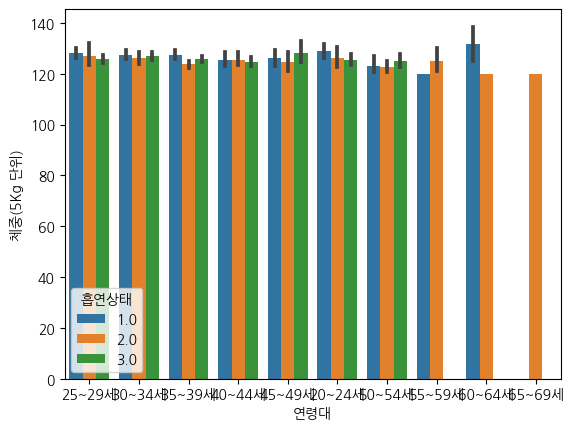

In [40]:
display(sns.barplot(data=weight_120,x="연령대",y="체중(5Kg 단위)",hue="흡연상태"))

<Axes: xlabel='연령대', ylabel='감마지티피'>

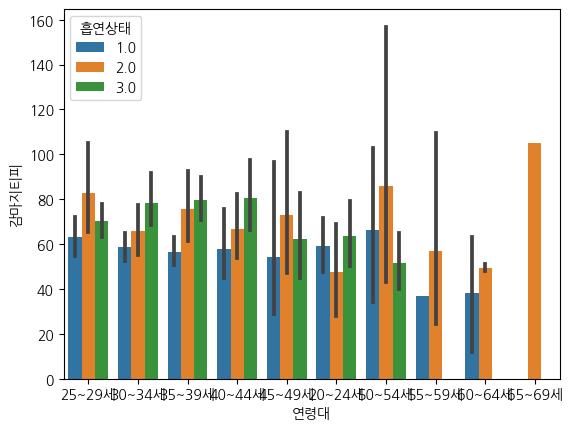

In [37]:
display(sns.barplot(data=weight_120,x="연령대",y="감마지티피",hue="흡연상태"))

In [53]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

for k in range(1,len(smoke)+1):
  weight_120.loc[weight_120["흡연상태"]==k,"흡연상태"] = smoke[k]
for k in range(0,len(drink)):
  weight_120.loc[weight_120["음주여부"]==k,"음주여부"] = drink[k]

In [54]:
weight_120.head()

,기준년도,가입자일련번호,성별코드,연령대,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,데이터공개일자
1219,2017,1220,2,25~29세,41,170.0,120.0,116.0,0.7,0.9,...,13.6,1.0,0.8,62.0,95.0,47.0,흡연중,안마심,0,20181126
2309,2017,2310,1,25~29세,30,190.0,155.0,127.0,0.8,0.9,...,13.9,1.0,0.9,21.0,26.0,19.0,흡연중,안마심,1,20181126
3497,2017,3498,1,30~34세,46,175.0,120.0,119.0,1.2,1.2,...,16.0,1.0,0.9,22.0,27.0,111.0,흡연중,마심,0,20181126
3685,2017,3686,1,30~34세,30,180.0,140.0,127.0,1.5,1.5,...,16.6,1.0,0.8,42.0,67.0,58.0,끊음,안마심,1,20181126
5788,2017,5789,1,35~39세,41,175.0,140.0,124.0,1.0,1.0,...,16.0,1.0,1.0,18.0,41.0,35.0,흡연안함,안마심,0,20181126


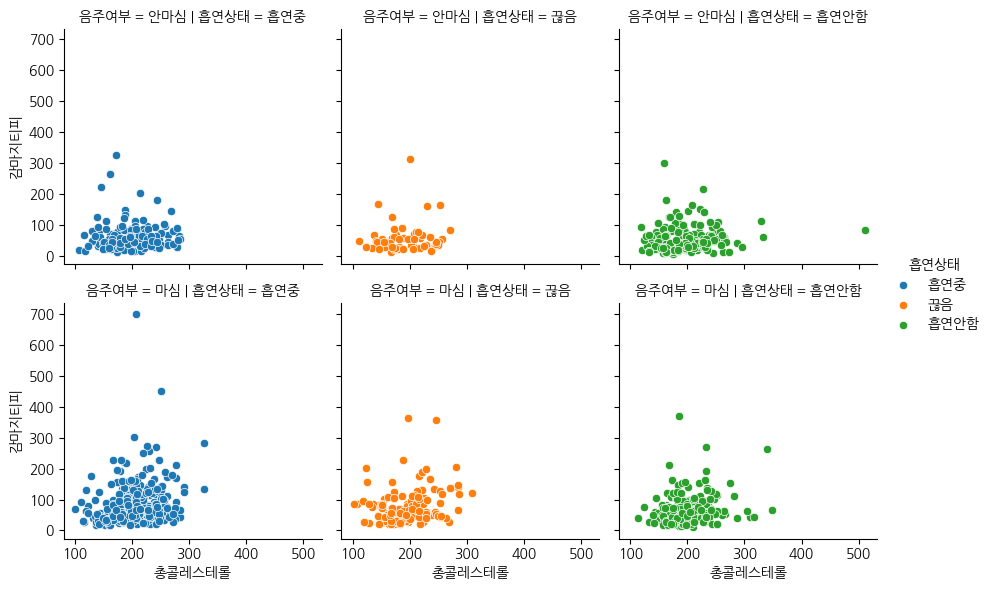

In [66]:
#@title FacetGrid 이용해보기 흡연여부 음주여부에 따라 데이터 따로 표기
# FacetGrid를 사용하여 그래프 그리기
g = sns.FacetGrid(weight_120, col="흡연상태", row="음주여부", hue="흡연상태")
g.map(sns.scatterplot, "총콜레스테롤", "감마지티피")

# 그래프 제목과 축 레이블 추가
g.add_legend()

g.set_axis_labels("총콜레스테롤", "감마지티피")

# 그래프 표시
plt.show()

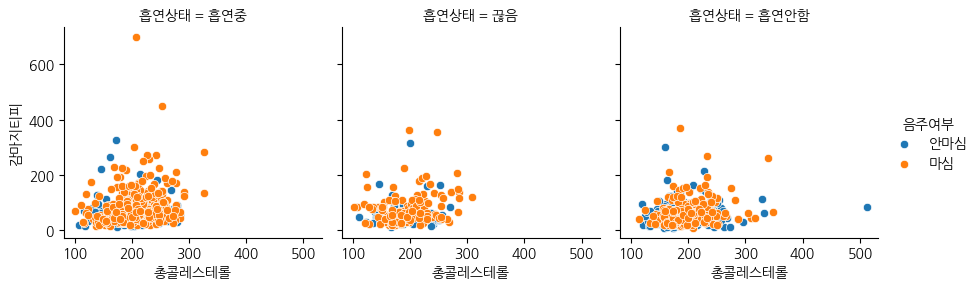

In [77]:
#@title FacetGrid 이용해보기 음주여부에 따라 데이터 같이 표기
# 흡연 상태에 따라 FacetGrid 생성
g = sns.FacetGrid(weight_120, col="흡연상태", hue="음주여부")
g.map(sns.scatterplot, "총콜레스테롤", "감마지티피")

# 그래프 제목과 축 레이블 추가
g.set_axis_labels("총콜레스테롤", "감마지티피")

# 범례 추가
g.add_legend(title="음주여부")

# 그래프 표시
plt.show()